pip install autokeras

pip install --upgrade protobuf

pip install --upgrade pip

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import autokeras as ak

2022-05-15 09:04:46.802190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-05-15 09:04:46.802253: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
#importing the dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
housing.target_names

['MedHouseVal']

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
#create a dataframe from the dataset
df=pd.DataFrame(data=housing.data,columns=housing.feature_names)
df["MedHouseVal"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.shape

(20640, 9)

In [7]:
#Defining X and y
X = df.drop(['MedHouseVal'], axis = 1)
y = df['MedHouseVal']

In [8]:
# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (16512, 8)
y_train: (16512,)
X_test: (4128, 8)
y_test: (4128,)


In [9]:
# Initialize the StructuredDataRegressor
reg = ak.StructuredDataRegressor(max_trials=5,overwrite=True,metrics=['mae'])
 
# Search for the best model.
reg.fit(X_train.to_numpy(),y_train.to_numpy(), validation_split=0.2,epochs=50, verbose=1)

Trial 5 Complete [00h 01m 29s]
val_loss: 0.3161202669143677

Best val_loss So Far: 0.3161202669143677
Total elapsed time: 00h 05m 38s
Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 0.8734 - mae: 0.6657
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.6560 - mae: 0.5785
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.5950 - mae: 0.5461
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.5346 - mae: 0.5123
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4958 - mae: 0.4947
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4774 - mae: 0.4866
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4639 - mae: 0.4777
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4443 - mae: 0.4695
Epoch 9/50
516/516 [==============================] - 1s 3ms/step - loss: 0.4409 - mae: 0.4723
Epoch 10/50

2022-05-15 09:11:45.871924: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [10]:
reg.evaluate(X_test, y_test)

129/129 [==============================] - 0s 2ms/step - loss: 0.3001 - mae: 0.3793


[0.3001440465450287, 0.37930357456207275]

In [11]:
predicted = reg.predict(X_test).flatten() * 100000
real = y_test.to_numpy() * 100000

for i in range(10):
    print('Predicted price:', predicted[i].round(3))
    print('Real price:', real[i].round(0))
    print('')

129/129 [==============================] - 0s 2ms/step
Predicted price: 57217.157
Real price: 47700.0

Predicted price: 142937.052
Real price: 45800.0

Predicted price: 478096.533
Real price: 500001.0

Predicted price: 252909.684
Real price: 218600.0

Predicted price: 243401.384
Real price: 278000.0

Predicted price: 177817.69
Real price: 158700.0

Predicted price: 244287.801
Real price: 198200.0

Predicted price: 179639.983
Real price: 157500.0

Predicted price: 328859.711
Real price: 340000.0

Predicted price: 449374.628
Real price: 446600.0



In [12]:
from sklearn.metrics import r2_score
r2_score(real, predicted).round(3)

0.771

In [13]:
# First we export the model to a keras model
keras_model = reg.export_model()
 
# Now, we ask for the model Sumary:
keras_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 8)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1024)              9216      
                                                                 
 re_lu (ReLU)                (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 32)                32800 

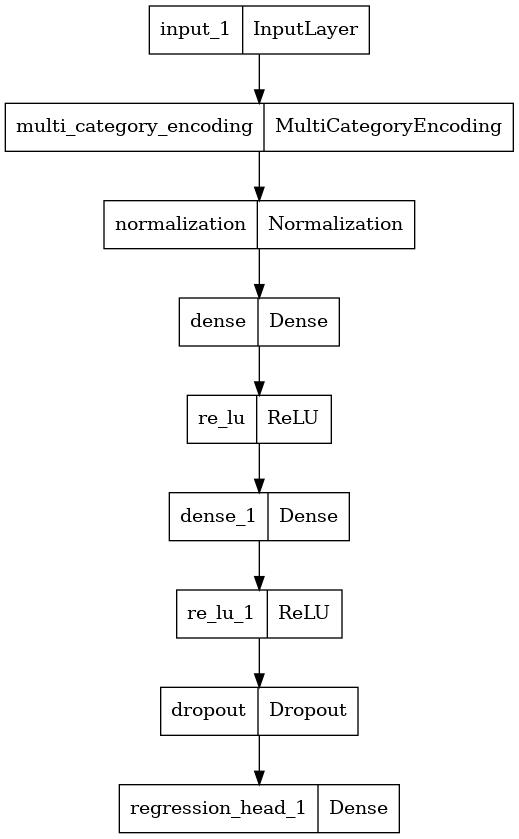

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(keras_model)

In [15]:
# Export as a Keras Model.
model = reg.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

<class 'keras.engine.functional.Functional'>


In [16]:
model.save('/content/models/regression_model',save_format="tf")

# **Classification**

In [18]:
import pandas as pd
df1= pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

In [19]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
#Defining X and y
X = df1.drop(['Outcome'], axis=1)
y = df1['Outcome']

# creating dataset split for prediction
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42) # 80-20 split

# Checking split 
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (614, 8)
y_train: (614,)
X_test: (154, 8)
y_test: (154,)


In [21]:
import autokeras as ak
clf = ak.StructuredDataClassifier(max_trials=5)
history_1 =clf.fit(X_train, y_train,epochs=50,validation_split=0.2, verbose=1)

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.7549019455909729

Best val_accuracy So Far: 0.7941176295280457
Total elapsed time: 00h 00m 27s
Epoch 1/50
20/20 [==============================] - 1s 2ms/step - loss: 0.6555 - accuracy: 0.6401
Epoch 2/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5746 - accuracy: 0.7362
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5237 - accuracy: 0.7492
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7655
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7752
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4579 - accuracy: 0.7850
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.7932
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7964
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.

In [22]:
clf.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5523 - accuracy: 0.7662


[0.5523024797439575, 0.7662337422370911]

In [23]:
loss, acc = clf.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % acc)

Accuracy: 0.77


In [24]:
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 multi_category_encoding (Mu  (None, 8)                0         
 ltiCategoryEncoding)                                            
                                                                 
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 32)                288       
                                                                 
 re_lu (ReLU)                (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056  

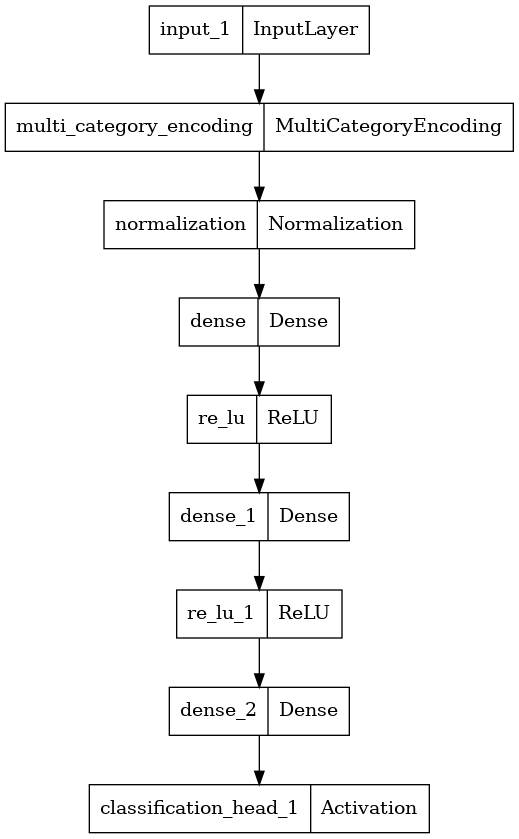

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [26]:
model.save('/content/models/classification_model',save_format="tf")

In [27]:
from keras.models import load_model
new_model= load_model('/content/models/classification_model')
print(new_model)